# Exercises

In [1]:
import acquire
from prepare import zillow_scale
from wrangle import acquire, prep, wrangle_zillow
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [3]:
df = wrangle_zillow()
df

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,6037
2152858,4,3.0,2262,960756,2015,13494.52,6059
2152859,4,4.5,3127,536061,2014,6244.16,6059
2152861,3,2.5,1974,424353,2015,5302.70,6059


In [8]:
df.dtypes

beds                         int64
baths                      float64
square_feet                  int64
value                        int64
year_built                   int64
tax_amount                 float64
federal_processing_code      int64
dtype: object

In [4]:
train_and_validate, test = train_test_split(df, random_state=117)
train, validate = train_test_split(train_and_validate)

In [13]:
scale_train = train.copy()

In [14]:
scaling_columns = ['beds', 'baths', 'tax_amount', 'square_feet']
scaler = MinMaxScaler()
scale_train[scaling_columns] = scaler.fit_transform(train[scaling_columns])
train.columns

Index(['beds', 'baths', 'square_feet', 'value', 'year_built', 'tax_amount',
       'federal_processing_code'],
      dtype='object')

## Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [33]:
X_train = scale_train.drop(columns={'value'})
y_train = scale_train['value']

In [34]:
def visualize_scaler(scaler, df, scaling_columns, bins = 15):
    fig, axs = plt.subplots(len(scaling_columns), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[scaling_columns] = scaler.fit_transform(df[scaling_columns])
    for (ax1, ax2), col in zip(axs, scaling_columns):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

### Min-Max Scale

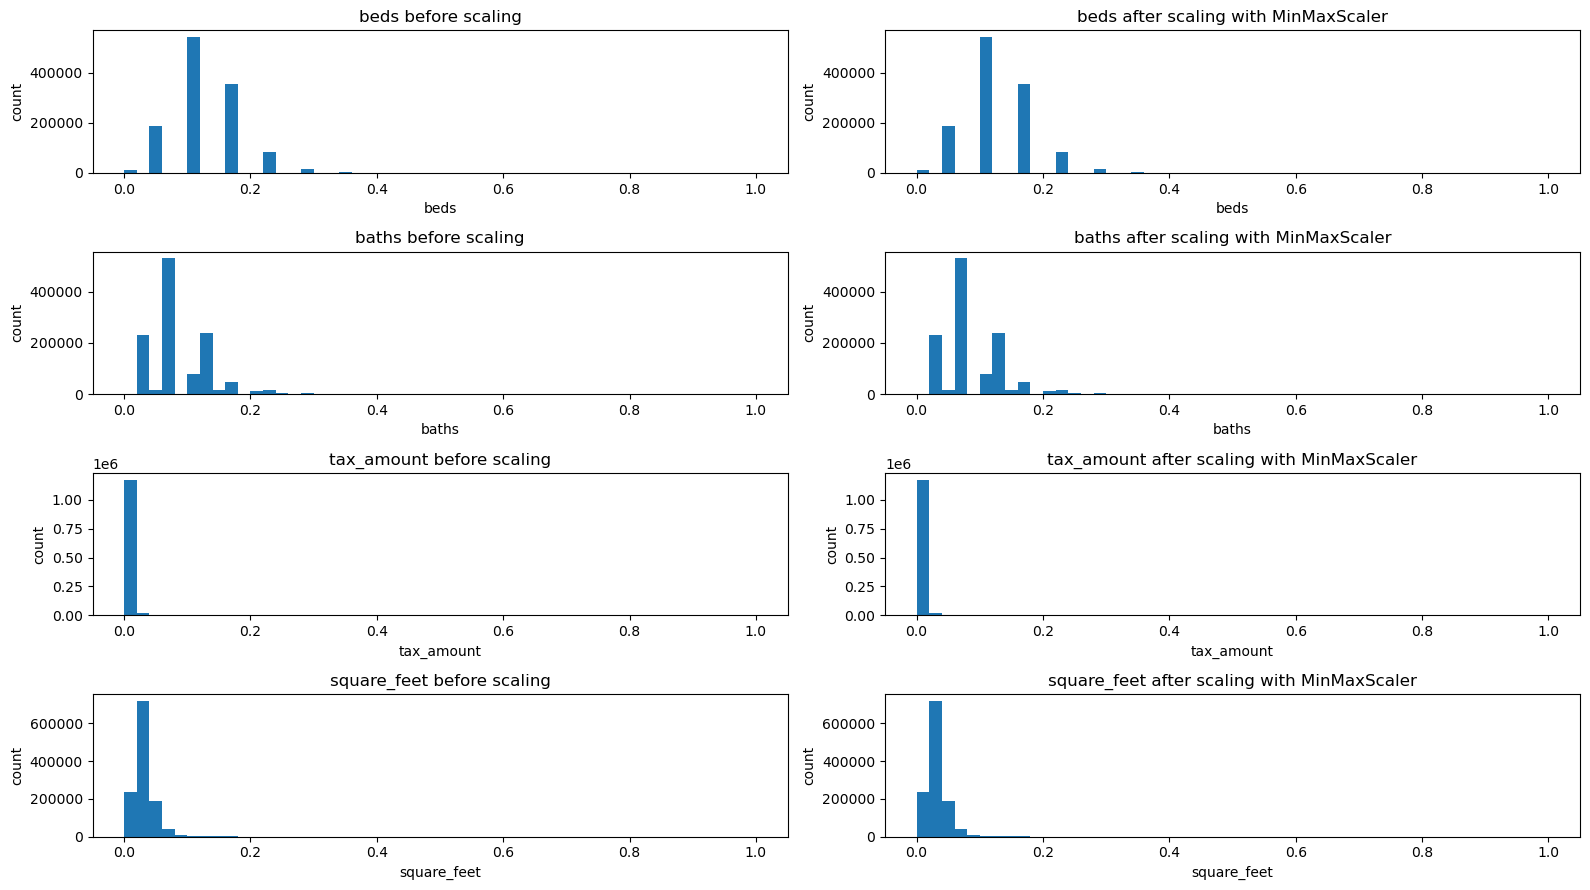

In [35]:
visualize_scaler(MinMaxScaler(), scale_train, scaling_columns, bins=50)

### Standard Scale

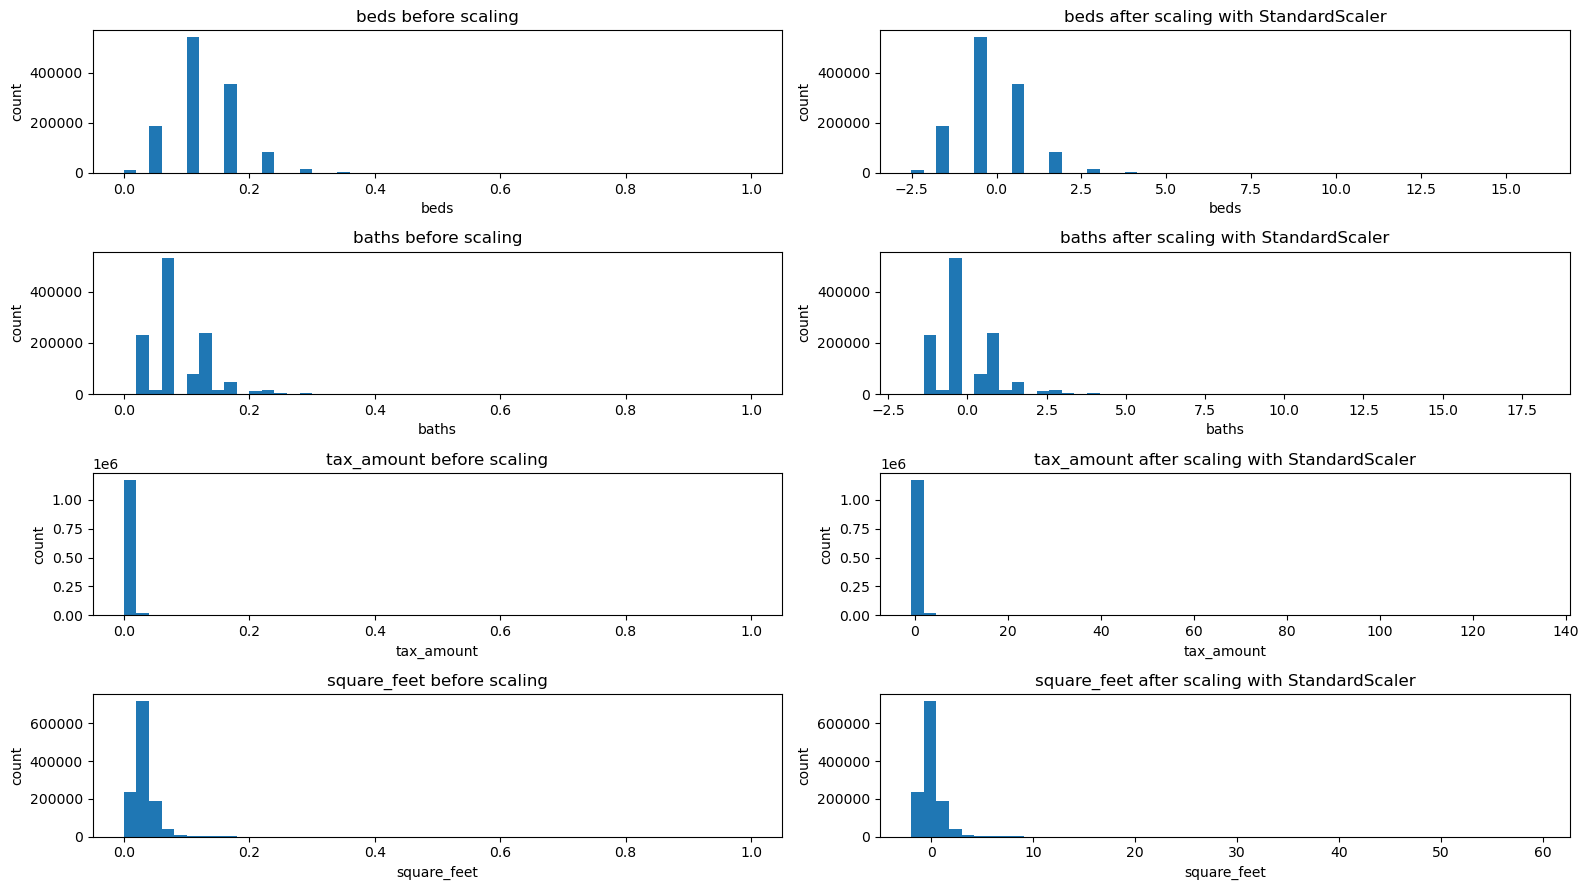

In [36]:
visualize_scaler(StandardScaler(), scale_train, scaling_columns, bins=50)

### Robust Scale

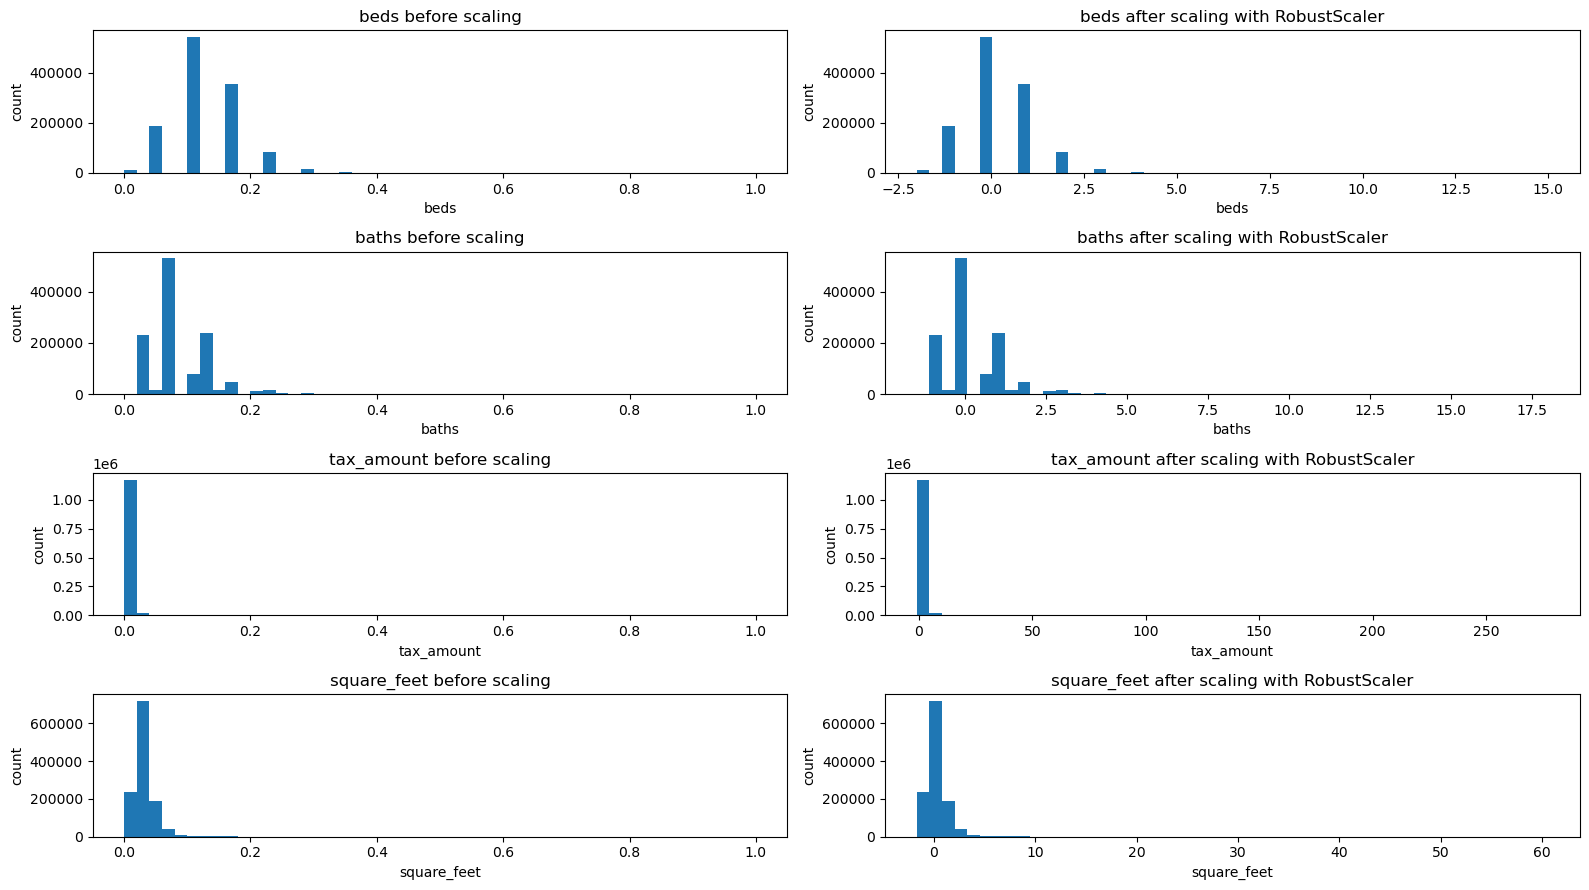

In [37]:
visualize_scaler(RobustScaler(), scale_train, scaling_columns, bins=50)

## Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [38]:
scaler.inverse_transform(scale_train)

ValueError: operands could not be broadcast together with shapes (1200885,7) (4,) (1200885,7) 

## Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

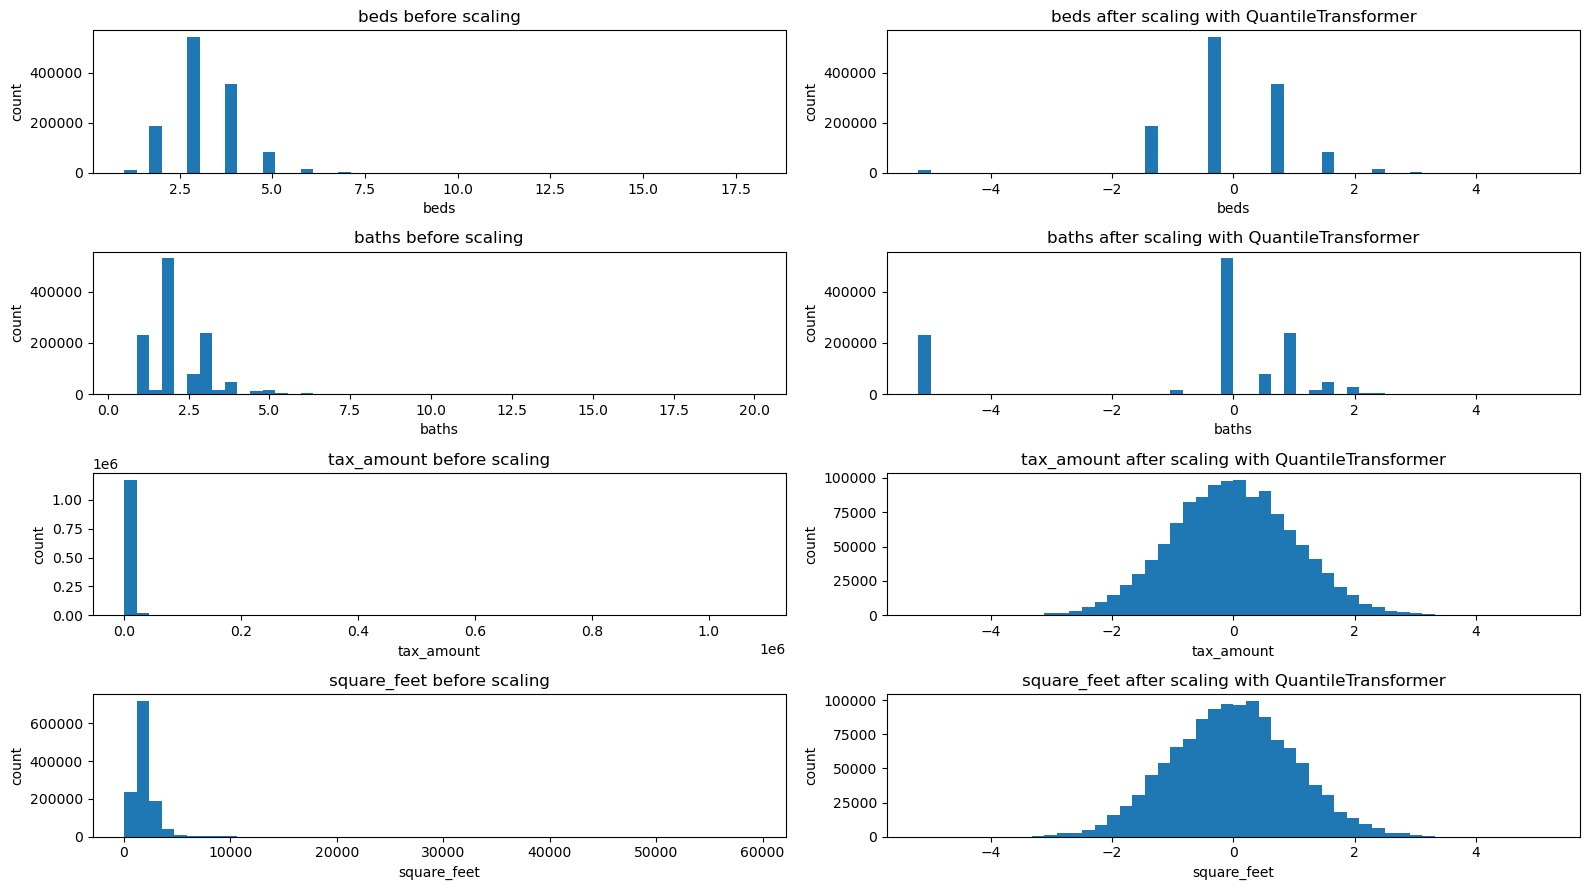

In [23]:
visualize_scaler(QuantileTransformer(output_distribution='normal'), train, scaling_columns, bins=50)

## Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

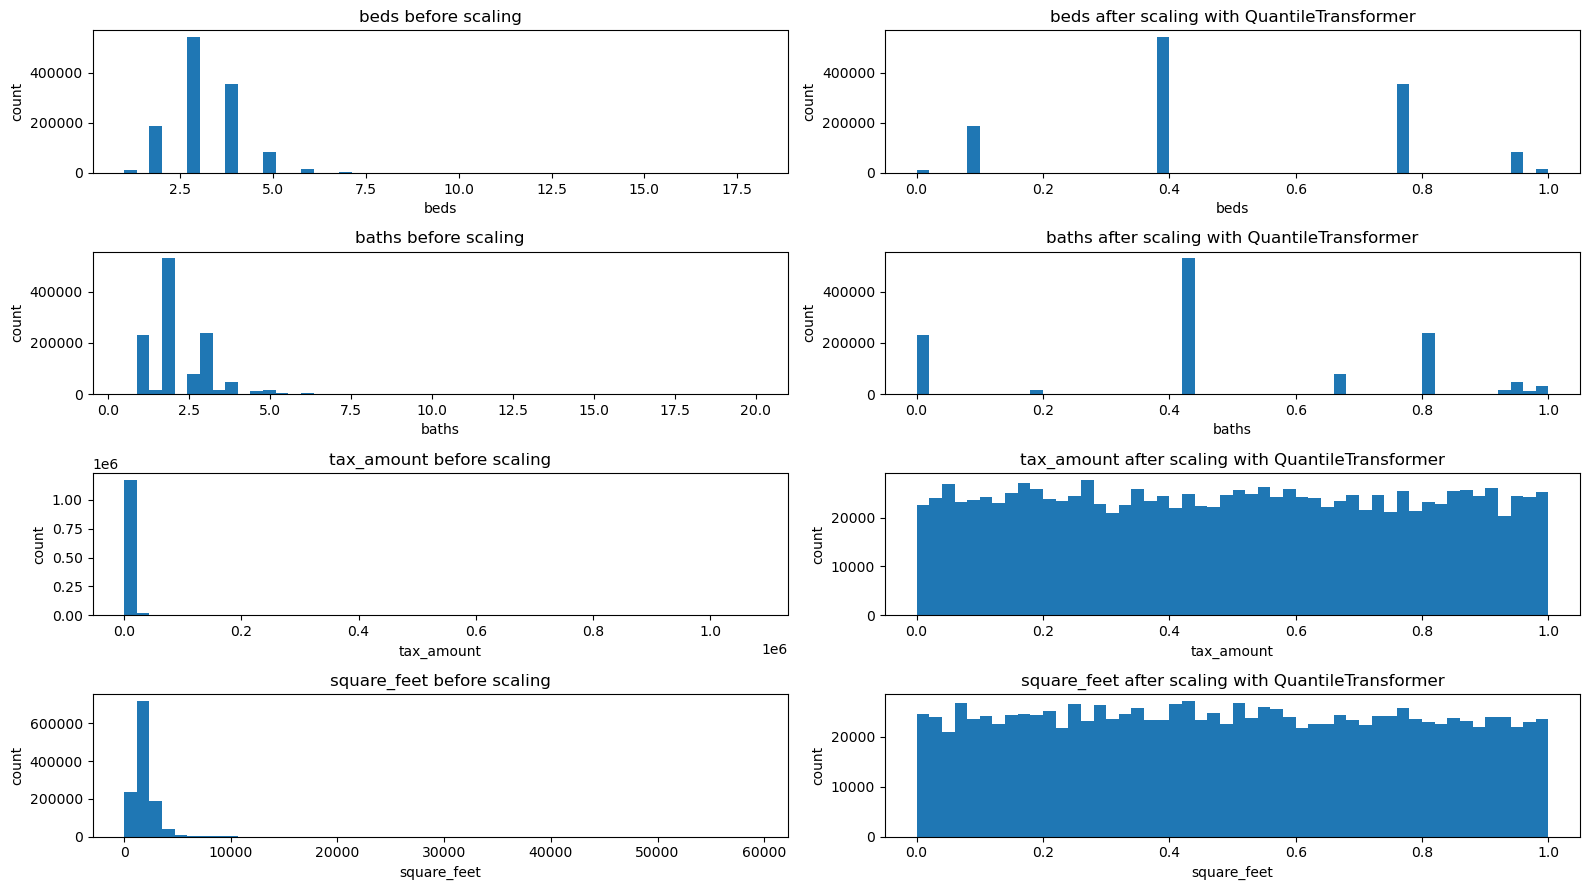

In [30]:
visualize_scaler(QuantileTransformer(), train, scaling_columns, bins=50)

### Our visual becomed must more evenly spread and easier to see by not listing our output distribution at 'normal'.

## Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [5]:
scaler, train_scaled, validate_scaled, test_scaled = zillow_scale(train,validate,test, return_scaler=True)

In [6]:
scaler

MinMaxScaler()

In [7]:
train_scaled

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code
2129531,0.083333,0.063492,0.039853,355000,1977,0.003981,6059
748434,0.083333,0.015873,0.027190,426495,1950,0.005062,6037
907626,0.083333,0.111111,0.075085,1369057,1994,0.015429,6037
494031,0.166667,0.079365,0.070668,216036,1976,0.002158,6059
1216645,0.125000,0.111111,0.110317,2843665,2013,0.028989,6111
...,...,...,...,...,...,...,...
1249612,0.083333,0.047619,0.045189,366895,1979,0.003677,6111
877446,0.041667,0.047619,0.039393,437147,1949,0.005166,6037
1532083,0.083333,0.047619,0.031428,512622,1941,0.006188,6037
1693679,0.125000,0.015873,0.041946,585000,1927,0.006792,6037
